<br>**Project in CMSC 132: Computer Architecture**
<br>1st Semester - A.Y. 2023-2024
<br><br>

---



# **I. AUTHORS**

**Laboratory Section:**
<br>&emsp;&emsp;&emsp;AB-8L
<br>
<br>**Group Members:**
<br>&emsp;&emsp;&emsp;Contaoi, Cherry Mae
<br>&emsp;&emsp;&emsp;Gabinete, Keith Ginoel
<br>&emsp;&emsp;&emsp;Lomat, Eirene

---
# **II. INSTALLATION AND GUIDES**

> Installation of Verilog






In [25]:
!pip install git+https://github.com/lesc-ufv/cad4u.git &> /dev/null
!git clone https://github.com/lesc-ufv/cad4u &> /dev/null
%load_ext plugin

The plugin extension is already loaded. To reload it, use:
  %reload_ext plugin


> Sample Verilog Code for Implementation (*From the Laboratory Handout*)



In [ ]:
%%verilog

/*
	Sample verilog code from the laboratory handout
*/
module fulladder(a, b, c, sum, cout);
  input a,b,c;
  output sum, cout;
    assign sum = a ^ b ^ c;
    assign cout = a&b| a&c | b&c;
endmodule


module logic_testbench();
reg [2:0] counter;
wire sum,cout;
wire [1:0] d;
assign d = {cout,sum};
integer k;
	fulladder t(counter[2],counter[1],counter[0],sum,cout);
	initial begin
		$display("abc | cout sum  Decimal");
		$monitor("%3b |  %1b    %1b       %d", counter, cout, sum, d);
		counter = 0;
		for (k=1; k<8; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

Installing. Please wait... done!
abc | cout sum  Decimal
000 |  0    0       0
001 |  0    1       1
010 |  0    1       1
011 |  1    0       2
100 |  0    1       1
101 |  1    0       2
110 |  1    0       2
111 |  1    1       3




> Sample Verilog Code for Circuit Design (*From the Laboratory Handout*)


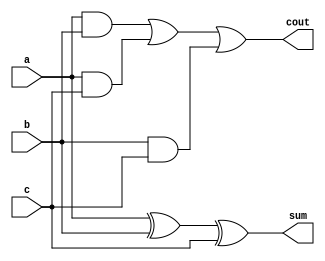

In [ ]:
%%print_verilog
module fulladder(a, b, c, sum, cout);
  input a,b,c;
  output sum, cout;
    assign sum = a ^ b ^ c;
    assign cout = a&b| a&c | b&c;
endmodule

---
# **III. MAIN COMPONENT**


**`DECODER`**

> Implementation of Decoder



In [29]:
%%verilog

// ======================================================================================================== FUNCTION DEFINITION OF THE MAIN COMPONENT

// ========================================================================================= FIRST IMPLEMENTATION

/*
  Implementation of a 2x4 decoder.

  The value of the output is just the concatenation of a and b.
  Given 2 1-bit inputs, the possible outputs are: 00, 01, 10, 11
*/

module decoder(input a, input b, output [1:0] o);
  assign o = {a,b};
endmodule

// ========================================================================== TESTBENCH

module decoder_testbench();
  reg a, b;
  wire [1:0] o;

  // Instantiation of the decoder
  decoder sample(.a(a), .b(b), .o(o));

  initial begin
    $display("Testbench");

    // ============================================== TEST CASES

    #1 a=1'b1; b=1'b1;
    $monitor("\ta=%b; b=%b; output=%b;", a, b, o);
    #1 a=1'b1; b=1'b0;
    #1 a=1'b0; b=1'b1;
    #1 a=1'b0; b=1'b0;
    $finish;
  end
endmodule



Testbench
	a=1; b=1; output=11;
	a=1; b=0; output=10;
	a=0; b=1; output=01;
	a=0; b=0; output=00;



> Alternative Implementation of Decoder (*Used in this project's final circuit design*)




In [28]:
%%verilog

// ========================================================================================= SECOND IMPLEMENTATION

/*
  Main component that accepts an 18-bit input

  Using a conditional operator to determine the value of the output.
  --> [format] conditional operator in verilog with an assignment statement:
          assign q = <condition> ? <if-true> : <else>;
*/

 module decoder(input a, input b, output [1:0] o);
  assign o = (a == 1'b0 && b == 1'b0) ? 2'b00 :
             (a == 1'b0 && b == 1'b1) ? 2'b01 :
             (a == 1'b1 && b == 1'b0) ? 2'b10 :
                                        2'b11;  // a=1 and b=1
endmodule

// ========================================================================== TESTBENCH

module decoder_testbench();
  reg a, b;
  wire [1:0] o;

  // Instantiation of the decoder
  decoder sample(.a(a), .b(b), .o(o));

  initial begin
    $display("Testbench");

    // ============================================== TEST CASES

    #1 a=1'b1; b=1'b1;
    $monitor("\ta=%b; b=%b; output=%b;", a, b, o);
    #1 a=1'b1; b=1'b0;
    #1 a=1'b0; b=1'b1;
    #1 a=1'b0; b=1'b0;
    $finish;
  end
endmodule

Testbench
	a=1; b=1; output=11;
	a=1; b=0; output=10;
	a=0; b=1; output=01;
	a=0; b=0; output=00;



> Circuit Diagram of Decoder (*1st Implementation*)

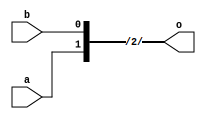

In [30]:
%%print_verilog
module decoder(input a, input b, output [1:0] o);
  assign o = {a,b};
endmodule

> Circuit Diagram of Decoder (*2nd Implementation*)

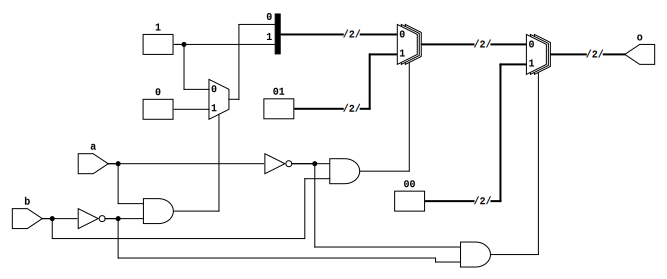

In [31]:
%%print_verilog
 module decoder(input a, input b, output [1:0] o);
  assign o = (a == 1'b0 && b == 1'b0) ? 2'b00 :
             (a == 1'b0 && b == 1'b1) ? 2'b01 :
             (a == 1'b1 && b == 1'b0) ? 2'b10 :
                                        2'b11;  // a=1 and b=1
endmodule

---
# **IV. OTHER COMPONENTS**


**`8-BIT FULL-ADDER`**

> Implementation of 8-Bit Full-Adder



In [33]:
%%verilog

// ========================================================================================= 1-BIT FULL ADDER

/*
	A function for 1-bit full-adder
 		boolean function for 1-bit full adder:
				Sum = Carry_in XOR A XOR B
				Carr_out = (A AND B) OR (Carry_in AND (A XOR B) )
*/

module fulladder(a, b, cin, sum, cout);
	input a,b,cin;
	output sum,cout;
	assign sum = cin ^ a ^ b;
	assign cout = (a&b)|(cin&(a^b));
endmodule

// ========================================================================================= 8-BIT FULL ADDER

/*
	A function for 8-bit full-adder
	implemented by cascading 8 1-bit full-adders
*/

module add8bits(input [7:0]a, input [7:0]b, output [7:0]sum);
	wire [7:0]cout;
	fulladder m0(a[0], b[0], 1'b0,		sum[0], cout[0]);
	fulladder m1(a[1], b[1], cout[0], sum[1], cout[1]);
	fulladder m2(a[2], b[2], cout[1], sum[2], cout[2]);
	fulladder m3(a[3], b[3], cout[2], sum[3], cout[3]);
	fulladder m4(a[4], b[4], cout[3], sum[4], cout[4]);
	fulladder m5(a[5], b[5], cout[4], sum[5], cout[5]);
	fulladder m6(a[6], b[6], cout[5], sum[6], cout[6]);
	fulladder m7(a[7], b[7], cout[6], sum[7], cout[7]);
endmodule

// ========================================================================== TESTBENCH

module fulladder_testbench();
	reg [7:0] a, b;
	wire [7:0] sum;

	// invoking the 8-bit full-adder function
	add8bits A(a,b,sum);

	initial begin
	  $display("TESTBENCH:");
		$display("\ta  +  b  = sum\n");
		$display("Sample Tests:");

			// ============================================== TEST CASES
		  #1 a=128; b=127;
			$monitor("\t%d + %d = %d", a,b,sum);
			#1 a=127; b=128;
			#1 a=4; b=4;
			#1 a=7; b=5;

		$finish;
	end
endmodule

TESTBENCH:
	a  +  b  = sum

Sample Tests:
	128 + 127 = 255
	127 + 128 = 255
	  4 +   4 =   8
	  7 +   5 =  12



> Circuit Diagram of 8-Bit Full-Adder



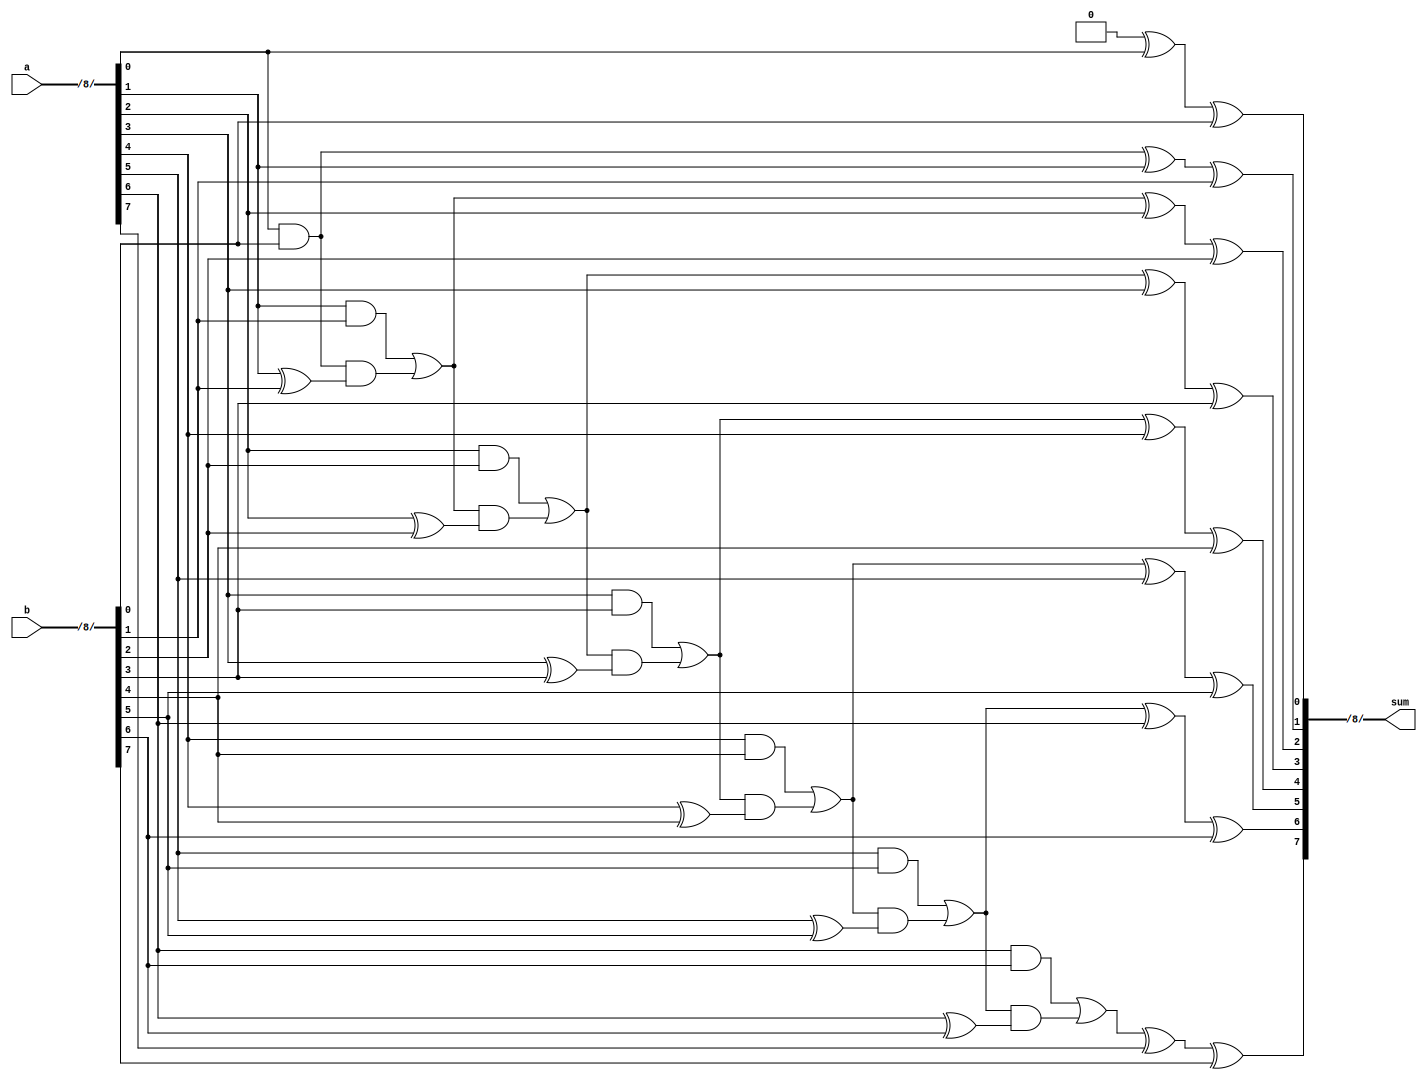

In [34]:
%%print_verilog
module fulladder(a, b, cin, sum, cout);
	input a,b,cin;
	output sum,cout;
	assign sum = cin ^ a ^ b;
	assign cout = (a&b)|(cin&(a^b));
endmodule

module add8bits(input [7:0]a, input [7:0]b, output [7:0]sum);
	wire [7:0]cout;
	fulladder m0(a[0], b[0], 1'b0,		sum[0], cout[0]);
	fulladder m1(a[1], b[1], cout[0], sum[1], cout[1]);
	fulladder m2(a[2], b[2], cout[1], sum[2], cout[2]);
	fulladder m3(a[3], b[3], cout[2], sum[3], cout[3]);
	fulladder m4(a[4], b[4], cout[3], sum[4], cout[4]);
	fulladder m5(a[5], b[5], cout[4], sum[5], cout[5]);
	fulladder m6(a[6], b[6], cout[5], sum[6], cout[6]);
	fulladder m7(a[7], b[7], cout[6], sum[7], cout[7]);
endmodule

**`8-BIT XOR LOGIC FUNCTION`**

> Implementation of the 8-Bit XOR Logic Function




In [35]:
%%verilog

// ========================================================================================= 8-BIT XOR LOGIC FUNCTION

/*
  a function for 8-bit XOR
*/

module xor_function(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = a[0] ^ b[0];
  assign o[1] = a[1] ^ b[1];
  assign o[2] = a[2] ^ b[2];
  assign o[3] = a[3] ^ b[3];
  assign o[4] = a[4] ^ b[4];
  assign o[5] = a[5] ^ b[5];
  assign o[6] = a[6] ^ b[6];
  assign o[7] = a[7] ^ b[7];
endmodule

// ========================================================================== TESTBENCH
module xor_testbench();
	reg [7:0] a, b;
	wire [7:0] o;

	// invoking the 8-bit XOR function
	xor_function O(a,b,o);

	initial begin
	  $display("TESTBENCH:");
		$display("\tA  XOR  B  = O");
		$display("Sample Tests:");

			// ============================================== TEST CASES
		  #1 a = 8'b10001001; b = 8'b10001111;
			$monitor("\t%b + %b = %b", a,b,o);
			#1 a = 8'b10100110; b = 8'b01011010;
			#1 a = 8'b01010101; b = 8'b10101010;
			#1 a = 8'b11111111; b = 8'b11111111;

		$finish;
	end
endmodule

TESTBENCH:
	A  XOR  B  = O
Sample Tests:
	10001001 + 10001111 = 00000110
	10100110 + 01011010 = 11111100
	01010101 + 10101010 = 11111111
	11111111 + 11111111 = 00000000



> Circuit Diagram of 8-Bit XOR Logic Function



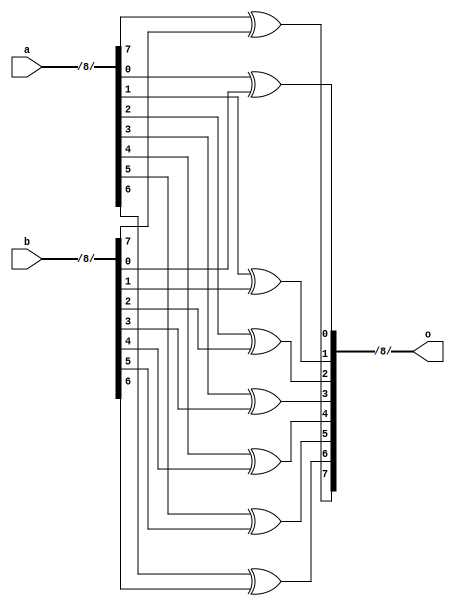

In [ ]:
%%print_verilog

module xor_function(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = a[0] ^ b[0];
  assign o[1] = a[1] ^ b[1];
  assign o[2] = a[2] ^ b[2];
  assign o[3] = a[3] ^ b[3];
  assign o[4] = a[4] ^ b[4];
  assign o[5] = a[5] ^ b[5];
  assign o[6] = a[6] ^ b[6];
  assign o[7] = a[7] ^ b[7];
endmodule

**`8-Bit NAND Logic Function`**

> Implementation of 8-Bit NAND Logic Function




In [37]:
%%verilog

// ========================================================================================= 8-BIT NAND LOGIC FUNCTION

/*
  a function for 8-bit NAND
*/
module nand_function(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = ~ ( a[0] & b[0] );
  assign o[1] = ~ ( a[1] & b[1] );
  assign o[2] = ~ ( a[2] & b[2] );
  assign o[3] = ~ ( a[3] & b[3] );
  assign o[4] = ~ ( a[4] & b[4] );
  assign o[5] = ~ ( a[5] & b[5] );
  assign o[6] = ~ ( a[6] & b[6] );
  assign o[7] = ~ ( a[7] & b[7] );
endmodule

// ========================================================================== TESTBENCH

module nand_testbench();
	reg [7:0] a, b;
	wire [7:0] o;

	// Invoking the 8-bit NAND logic function
	nand_function O(a,b,o);

	initial begin
	  $display("TESTBENCH:");
		$display("\tA  NAND  B  = O");
		$display("Sample Tests:");

    	// ============================================== TEST CASES

		  #1 a = 8'b10001001; b = 8'b10001111;
			$monitor("\t%b + %b = %b", a,b,o);
			#1 a = 8'b11111111; b = 8'b11111111;
			#1 a = 8'b10101010; b = 8'b01010101;
			#1 a = 8'b00000000; b = 8'b00000000;

		$finish;
	end
endmodule

TESTBENCH:
	A  NAND  B  = O
Sample Tests:
	10001001 + 10001111 = 01110110
	11111111 + 11111111 = 00000000
	10101010 + 01010101 = 11111111
	00000000 + 00000000 = 11111111



> Circuit Diagram of 8-Bit NAND Logic Function



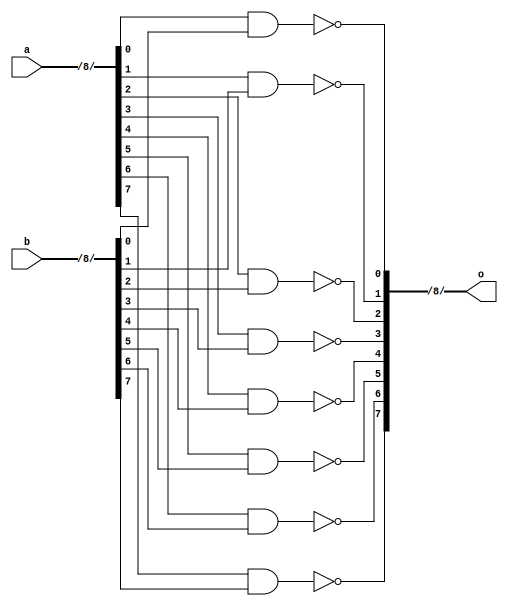

In [ ]:
%%print_verilog
module nand_function(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = ~ ( a[0] & b[0] );
  assign o[1] = ~ ( a[1] & b[1] );
  assign o[2] = ~ ( a[2] & b[2] );
  assign o[3] = ~ ( a[3] & b[3] );
  assign o[4] = ~ ( a[4] & b[4] );
  assign o[5] = ~ ( a[5] & b[5] );
  assign o[6] = ~ ( a[6] & b[6] );
  assign o[7] = ~ ( a[7] & b[7] );
endmodule

**` 8-Bit Unique Function`**

> Implementation of the 8-Bit Unique Function (*Used in this project's final circuit design*)
<br>*AND(A,B) OR NOT(A)*



In [39]:
%%verilog

// ========================================================================================= 8-BIT UNIQUE FUNCTION

/*
  Implementation of the 8-bit logic function assigned to our section (AB-8L)

  FUNCTION (A,B)
      O = AND(A, B) + NOT(A)
*/
module ab8l(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = a[0] & b[0] | ~a[0];
  assign o[1] = a[1] & b[1] | ~a[1];
  assign o[2] = a[2] & b[2] | ~a[2];
  assign o[3] = a[3] & b[3] | ~a[3];
  assign o[4] = a[4] & b[4] | ~a[4];
  assign o[5] = a[5] & b[5] | ~a[5];
  assign o[6] = a[6] & b[6] | ~a[6];
  assign o[7] = a[7] & b[7] | ~a[7];
endmodule

// ========================================================================== TESTBENCH

module ab8l_testbench();
  reg [7:0] a, b;
  wire [7:0] o;
  ab8l O(a,b,o);

	initial begin
    $display("TESTBENCH:");
		$display("\tLogic Function:\n\t\tAND(A, B) + NOT(A) = O");

      // ============================================== TEST CASES

      $display("Sample Tests:");
      #1 a = 8'b10000000; b = 8'b00000001;
		  $monitor("\t\t%b & %b | ~ %b = %b", a, b, a, o);
      #1 a = 8'b11111111; b = 8'b11111111;
			#1 a = 8'b10101010; b = 8'b01010101;
			#1 a = 8'b00000000; b = 8'b00000000;

		$finish;
	end
endmodule

TESTBENCH:
	Logic Function:
		AND(A, B) + NOT(A) = O
Sample Tests:
		10000000 & 00000001 | ~ 10000000 = 01111111
		11111111 & 11111111 | ~ 11111111 = 11111111
		10101010 & 01010101 | ~ 10101010 = 01010101
		00000000 & 00000000 | ~ 00000000 = 11111111



> Alternative Implementation of 8-Bit Unique Function



In [ ]:
%%verilog

/*
  Implementation of the logic function assigned to our section (AB-8L)

  FUNCTION (A,B)
      O = AND(A, B) + NOT(A)
*/
module ab8l(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o = a & b | ~a;
endmodule

// ========================================================================== TESTBENCH

module ab8l_testbench();
  reg [7:0] a, b;
  wire [7:0] o;
  ab8l O(a,b,o);

	initial begin
    $display("TESTBENCH:");
		$display("\tLogic Function:\n\t\tAND(A, B) + NOT(A) = O");

      // ============================================== TEST CASES

      $display("Sample Tests:");
      #1 a = 8'b10000000; b = 8'b00000001;
		  $monitor("\t\t%b & %b | ~ %b = %b", a, b, a, o);
      #1 a = 8'b11111111; b = 8'b11111111;
			#1 a = 8'b10101010; b = 8'b01010101;
			#1 a = 8'b00000000; b = 8'b00000000;

		$finish;
	end
endmodule

TESTBENCH:
	Logic Function:
		AND(A, B) + NOT(A) = O
Sample Tests:
		10000000 & 00000001 | ~ 10000000 = 01111111
		11111111 & 11111111 | ~ 11111111 = 11111111
		10101010 & 01010101 | ~ 10101010 = 01010101
		00000000 & 00000000 | ~ 00000000 = 11111111



> Circuit Diagram of 8-Bit Unique Function (*1st Implementation*)



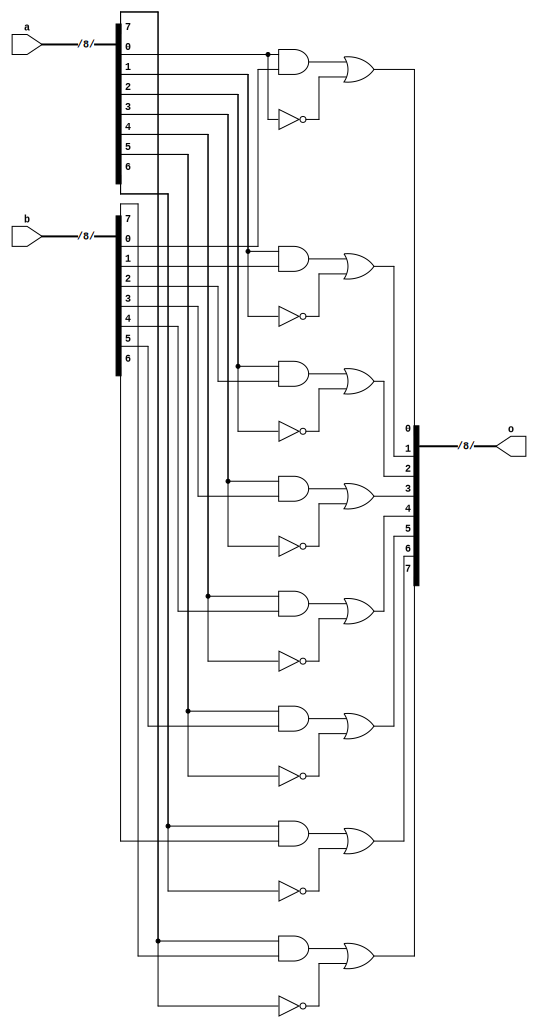

In [ ]:
%%print_verilog

module ab8l(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = a[0] & b[0] | ~a[0];
  assign o[1] = a[1] & b[1] | ~a[1];
  assign o[2] = a[2] & b[2] | ~a[2];
  assign o[3] = a[3] & b[3] | ~a[3];
  assign o[4] = a[4] & b[4] | ~a[4];
  assign o[5] = a[5] & b[5] | ~a[5];
  assign o[6] = a[6] & b[6] | ~a[6];
  assign o[7] = a[7] & b[7] | ~a[7];
endmodule

> Circuit Diagram of 8-Bit Unique Function (*2nd Implementation*)



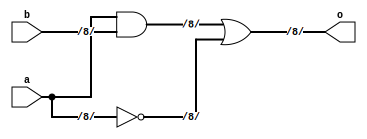

In [40]:
%%print_verilog

module ab8l(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o = a & b | ~a;
endmodule

---

# **V. FINAL COMBINATIONAL CIRCUIT DESIGN**

> Integration of Components + Testbench



In [41]:
%%verilog

// ======================================================================================================== FUNCTION DEFINITION OF 4 MAJOR COMPONENTS

// ========================================================================================= 8-BIT FULL ADDER

/*
	- A function for 1-bit Full-Adder.
 		  ->  Boolean function for 1-bit Full-Adder:
              Sum = Carry_in XOR A XOR B
              Carr_out = (A AND B) OR (Carry_in AND (A XOR B) )
*/

module fulladder(a, b, cin, sum, cout);
	input a,b,cin;
	output sum,cout;
	assign sum = cin ^ a ^ b;
	assign cout = (a&b)|(cin&(a^b));
endmodule

/*
	- A function for 8-bit Full-Adder
	    ->  Implemented by cascading 8 1-Bit Full-Adders
*/

module add8bits(input [7:0]a, input [7:0]b, output [7:0]sum);
	wire [7:0]cout;
	fulladder m0(a[0], b[0], 1'b0,		sum[0], cout[0]);
	fulladder m1(a[1], b[1], cout[0], sum[1], cout[1]);
	fulladder m2(a[2], b[2], cout[1], sum[2], cout[2]);
	fulladder m3(a[3], b[3], cout[2], sum[3], cout[3]);
	fulladder m4(a[4], b[4], cout[3], sum[4], cout[4]);
	fulladder m5(a[5], b[5], cout[4], sum[5], cout[5]);
	fulladder m6(a[6], b[6], cout[5], sum[6], cout[6]);
	fulladder m7(a[7], b[7], cout[6], sum[7], cout[7]);
endmodule

// ========================================================================================= 8-BIT XOR LOGIC FUNCTION

module xor_function(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = a[0] ^ b[0];
  assign o[1] = a[1] ^ b[1];
  assign o[2] = a[2] ^ b[2];
  assign o[3] = a[3] ^ b[3];
  assign o[4] = a[4] ^ b[4];
  assign o[5] = a[5] ^ b[5];
  assign o[6] = a[6] ^ b[6];
  assign o[7] = a[7] ^ b[7];
endmodule

// ========================================================================================= 8-BIT NAND

module nand_function(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = ~ ( a[0] & b[0] );
  assign o[1] = ~ ( a[1] & b[1] );
  assign o[2] = ~ ( a[2] & b[2] );
  assign o[3] = ~ ( a[3] & b[3] );
  assign o[4] = ~ ( a[4] & b[4] );
  assign o[5] = ~ ( a[5] & b[5] );
  assign o[6] = ~ ( a[6] & b[6] );
  assign o[7] = ~ ( a[7] & b[7] );
endmodule

// ========================================================================================= 8-BIT UNIQUE FUNCTION

/*
  - Implementation ff the 8-bit logic function assigned to AB-8L
      ->  FUNCTION (A,B)
              O = AND(A, B) + NOT(A)
*/

module ab8l(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = a[0] & b[0] | ~a[0];
  assign o[1] = a[1] & b[1] | ~a[1];
  assign o[2] = a[2] & b[2] | ~a[2];
  assign o[3] = a[3] & b[3] | ~a[3];
  assign o[4] = a[4] & b[4] | ~a[4];
  assign o[5] = a[5] & b[5] | ~a[5];
  assign o[6] = a[6] & b[6] | ~a[6];
  assign o[7] = a[7] & b[7] | ~a[7];
endmodule

// ======================================================================================================== FUNCTION DEFINITION OF THE MAIN COMPONENT

/*
  - Main component that accepts an 18-bit input.
  - Using a conditional operator to determine the value of the output ("?: conditional operator in Verilog", n.d.).
      ->  conditional operator in verilog with an assignment statement:
              [FORMAT] assign q = <condition> ? <if-true> : <else>;
*/

module decoder(input [17:0]a, output [7:0] o);
  wire [7:0] fulladder_result, xor_result, nand_result, ab8l_result;

  // Instantiation of the other components
  add8bits w(a[15:8], a[7:0], fulladder_result);
  xor_function x(a[15:8], a[7:0], xor_result);
  nand_function y(a[15:8], a[7:0], nand_result);
  ab8l z(a[15:8], a[7:0], ab8l_result);

  // Output
  assign o = (a[17:16] == 2'b00) ? fulladder_result :
             (a[17:16] == 2'b01) ? xor_result :
             (a[17:16] == 2'b10) ? nand_result :
                                   ab8l_result;
endmodule

// ======================================================================================================== TESTBENCH

module project_testbench();
  reg [17:0] a;
  wire [7:0] o;
  decoder O(a, o);

	initial begin
		$display("[TESTBENCH] - 18 BITS INPUT");

// ========================================================================================= Laboratory Test Cases

      #1 $display("\nLaboratory Test Runs:\n");

      // 10+90 = 100
      #1 a = 18'b000000101001011010;
	    $monitor("\t   input: %b %b %b; \t output: %b %b", a[17:16], a[15:8], a[7:0], o[7:4], o[3:0]);

      // 1010 1010 XOR 0101 0101; expected output = 1111 1111
      #1 a = 18'b011010101001010101;

      // 1111 1100 NAND 0011 1111; expected output = 1100 0011
      #1 a = 18'b101111110000111111;

      // Function(10000000, 00000001) = 01111111
      #1 a = 18'b111000000000000001;

// ========================================================================================= Other Test Cases

      #2 $display("\nOther Test Runs:");

// ----------------------------------------------------------------------------- FULL ADDER

      #3 $display("\n\t-- FULL ADDER");
      #3 a = 18'b000111111100000001; // 127 + 1    operand1: 0111 1111
      #3                             //            operand2: 0000 0001
      #3                             //                      1000 0000 (RESULT)

      #3 a = 18'b001111111100000001; // 255 + 1    operand1: 1111 1111
      #3                             //            operand2: 0000 0001
      #3                             //                      0000 0000 (RESULT)

      #3 a = 18'b001100100001100100; // 200 + 100  operand1: 1100 1000
      #3                             //            operand2: 0110 0100
      #3                             //                      0010 1100 (RESULT)

// ----------------------------------------------------------------------------- XOR

      #4 $display("\n\t-- XOR");
      #4 a = 18'b010111111100000001; //            operand1: 0111 1111
      #4                             //            operand2: 0000 0001
      #4                             //                      0111 1110 (RESULT)

      #4 a = 18'b011111111100000001; //            operand1: 1111 1111
      #4                             //            operand2: 0000 0001
      #4                             //                      1111 1110 (RESULT)

      #4 a = 18'b011100100001100100; //            operand1: 1100 1000
      #4                             //            operand2: 0110 0100
      #4                             //                      1010 1100 (RESULT)

// ----------------------------------------------------------------------------- NAND

      #5 $display("\n\t-- NAND");
      #5 a = 18'b100111111100000001; // NAND       operand1: 0111 1111
      #5                             //            operand2: 0000 0001
      #5                             //                      1111 1110 (RESULT)

      #5 a = 18'b101111111100000001; // NAND       operand1: 1111 1111
      #5                             //            operand2: 0000 0001
      #5                             //                      1111 1110 (RESULT)

      #5 a = 18'b101100100001100100; // NAND       operand1: 1100 1000
      #5                             //            operand2: 0110 0100
      #5                             //                      1011 1111 (RESULT)

// ----------------------------------------------------------------------------- AND(A,B) OR NOT(A)

      #6 $display("\n\t-- AND(A,B) OR NOT(A)");
      #6 a = 18'b110111111100000001; // FUNC       operand1: 0111 1111
      #6                             //            operand2: 0000 0001
      #6                             //                      1000 0001 (RESULT)

      #6 a = 18'b111111111100000001; // FUNC       operand1: 1111 1111
      #6                             //            operand2: 0000 0001
      #6                             //                      0000 0001 (RESULT)

      #6 a = 18'b111100100001100100; // FUNC       operand1: 1100 1000
      #6                             //            operand2: 0110 0100
      #6                             //                      0111 0111 (RESULT)

		$finish;
	end
endmodule


[TESTBENCH] - 18 BITS INPUT

Laboratory Test Runs:

	   input: 00 00001010 01011010; 	 output: 0110 0100
	   input: 01 10101010 01010101; 	 output: 1111 1111
	   input: 10 11111100 00111111; 	 output: 1100 0011
	   input: 11 10000000 00000001; 	 output: 0111 1111

Other Test Runs:

	-- FULL ADDER
	   input: 00 01111111 00000001; 	 output: 1000 0000
	   input: 00 11111111 00000001; 	 output: 0000 0000
	   input: 00 11001000 01100100; 	 output: 0010 1100

	-- XOR
	   input: 01 01111111 00000001; 	 output: 0111 1110
	   input: 01 11111111 00000001; 	 output: 1111 1110
	   input: 01 11001000 01100100; 	 output: 1010 1100

	-- NAND
	   input: 10 01111111 00000001; 	 output: 1111 1110
	   input: 10 11111111 00000001; 	 output: 1111 1110
	   input: 10 11001000 01100100; 	 output: 1011 1111

	-- AND(A,B) OR NOT(A)
	   input: 11 01111111 00000001; 	 output: 1000 0001
	   input: 11 11111111 00000001; 	 output: 0000 0001
	   input: 11 11001000 01100100; 	 output: 0111 0111



> Circuit Diagram



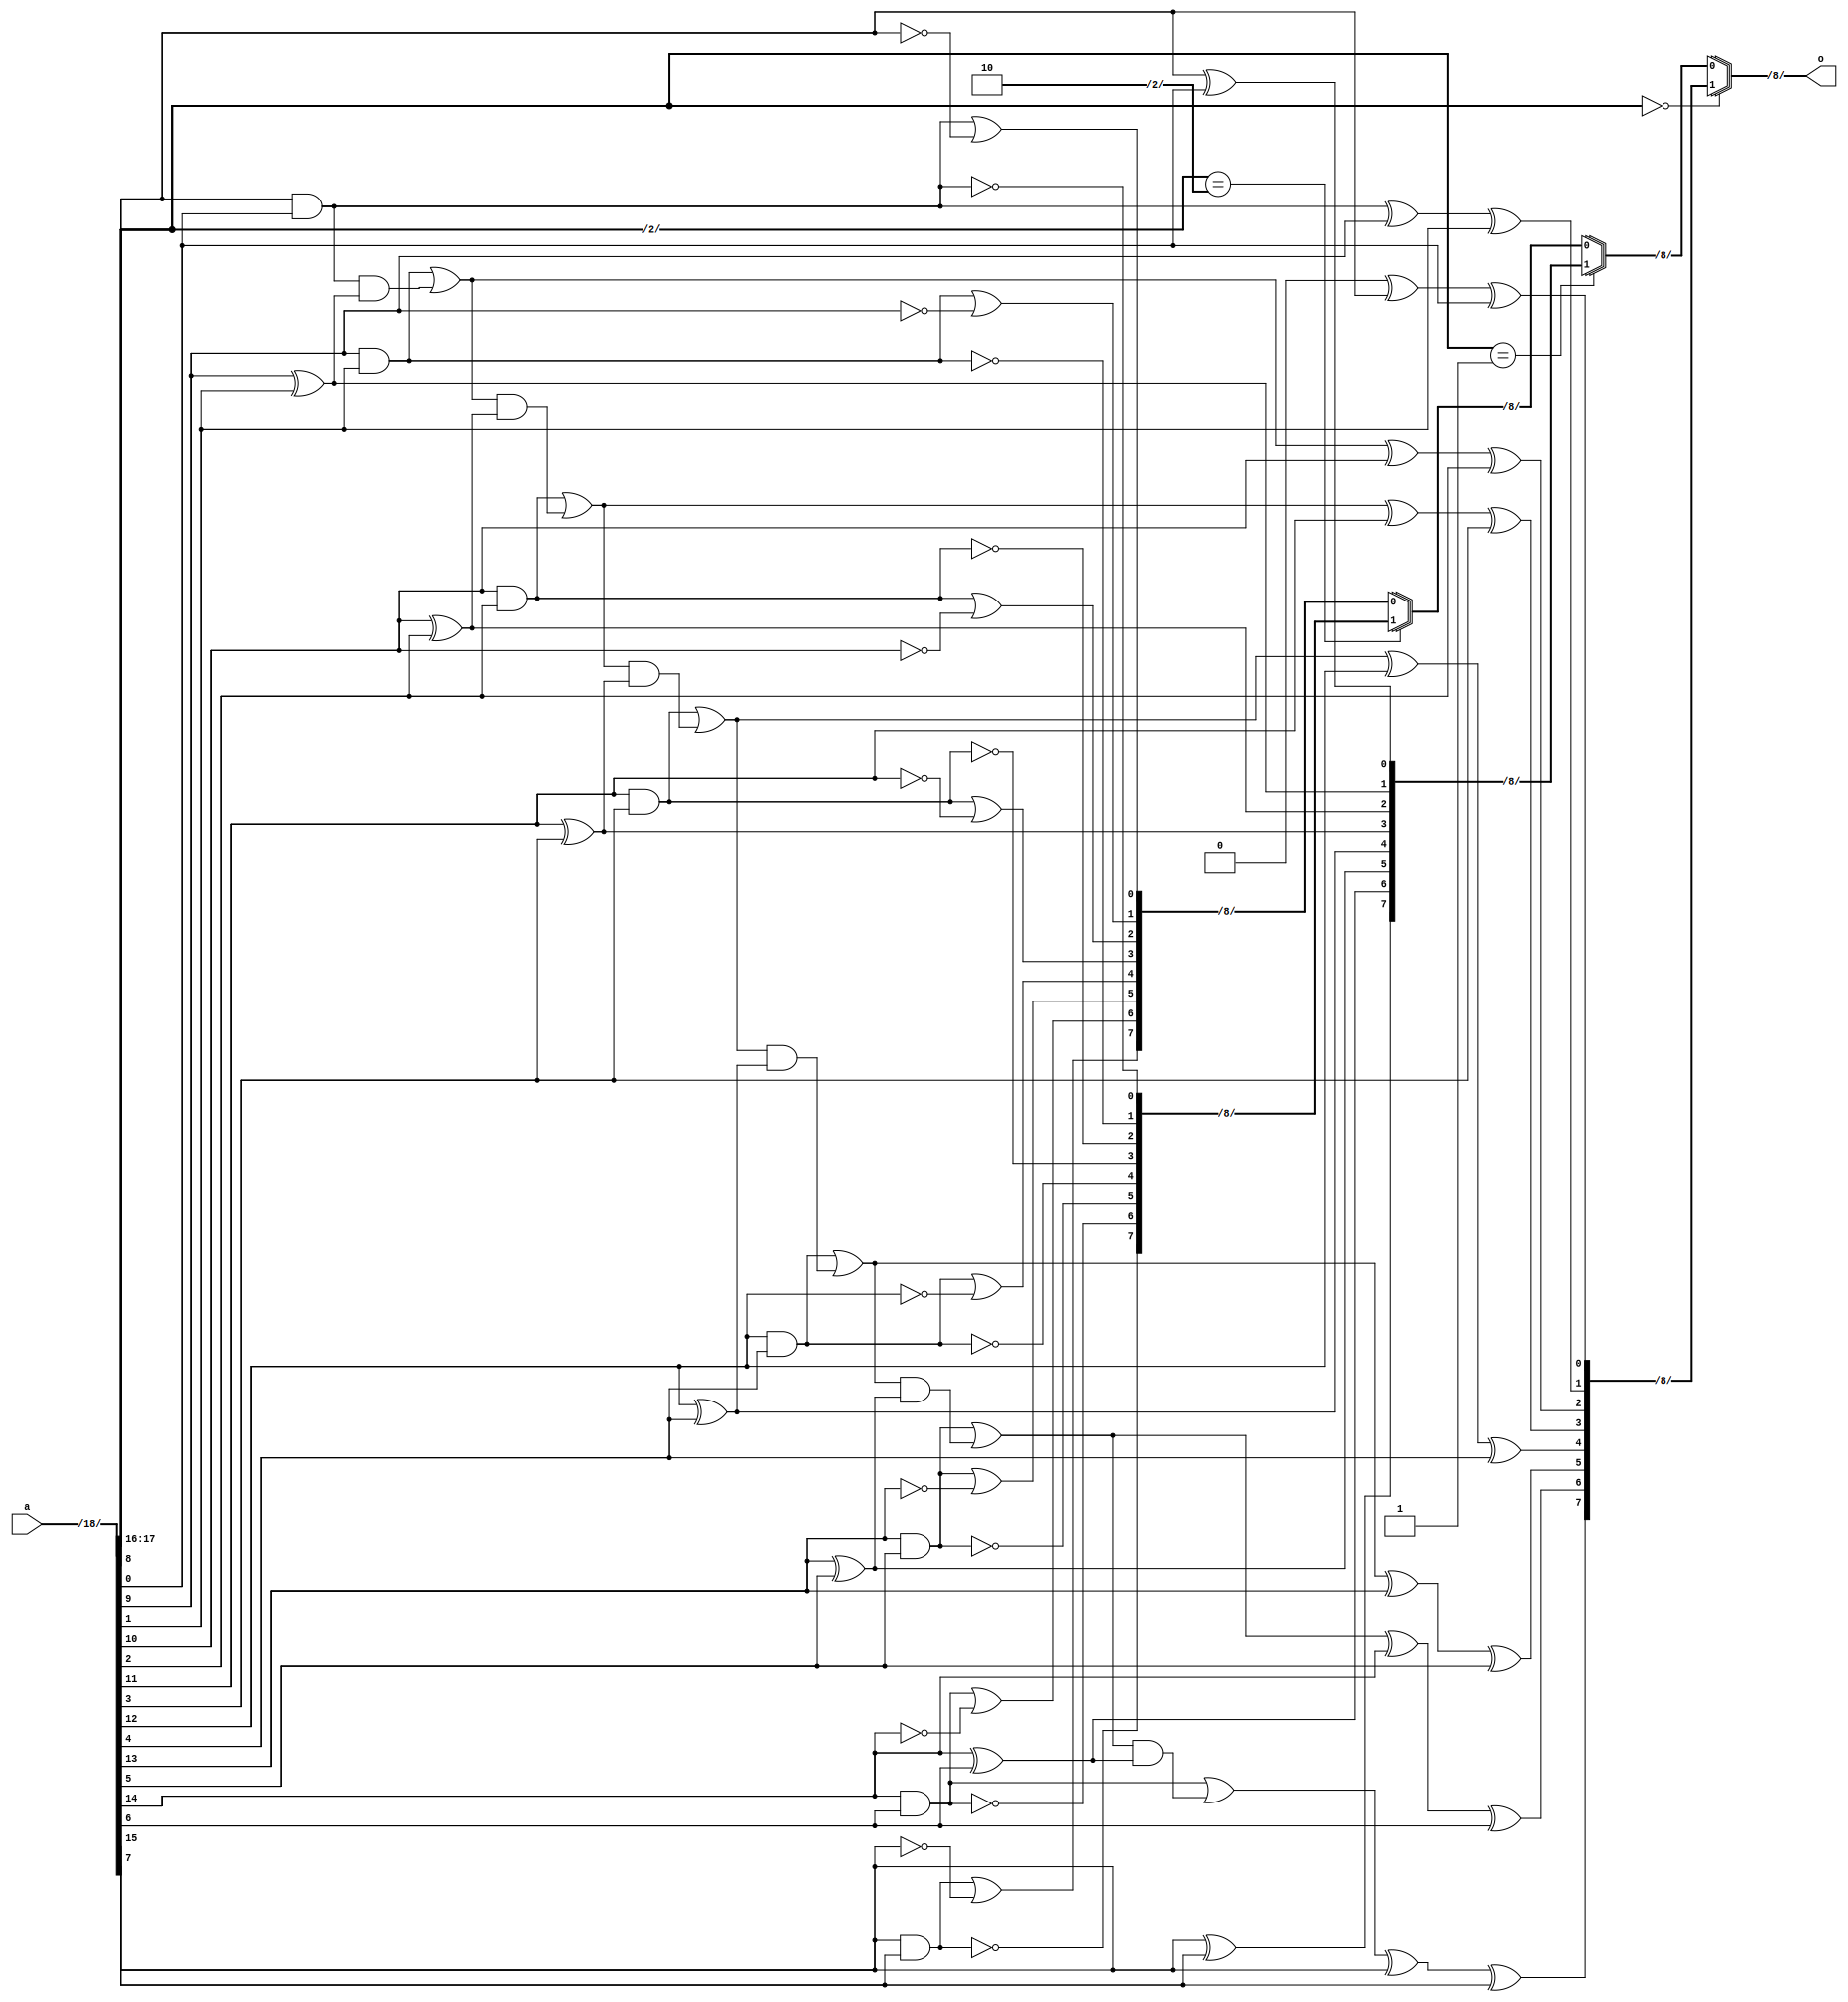

In [ ]:
%%print_verilog

// ======================================================================================================== FUNCTION DEFINITION OF 4 MAJOR COMPONENTS

// ========================================================================================= 8-BIT FULL ADDER

/*
	- A function for 1-bit Full-Adder.
 		  ->  Boolean function for 1-bit Full-Adder:
              Sum = Carry_in XOR A XOR B
              Carr_out = (A AND B) OR (Carry_in AND (A XOR B) )
*/

module fulladder(a, b, cin, sum, cout);
	input a,b,cin;
	output sum,cout;
	assign sum = cin ^ a ^ b;
	assign cout = (a&b)|(cin&(a^b));
endmodule

/*
	- A function for 8-bit Full-Adder
	    ->  Implemented by cascading 8 1-Bit Full-Adders
*/

module add8bits(input [7:0]a, input [7:0]b, output [7:0]sum);
	wire [7:0]cout;
	fulladder m0(a[0], b[0], 1'b0,		sum[0], cout[0]);
	fulladder m1(a[1], b[1], cout[0], sum[1], cout[1]);
	fulladder m2(a[2], b[2], cout[1], sum[2], cout[2]);
	fulladder m3(a[3], b[3], cout[2], sum[3], cout[3]);
	fulladder m4(a[4], b[4], cout[3], sum[4], cout[4]);
	fulladder m5(a[5], b[5], cout[4], sum[5], cout[5]);
	fulladder m6(a[6], b[6], cout[5], sum[6], cout[6]);
	fulladder m7(a[7], b[7], cout[6], sum[7], cout[7]);
endmodule

// ========================================================================================= 8-BIT XOR LOGIC FUNCTION

module xor_function(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = a[0] ^ b[0];
  assign o[1] = a[1] ^ b[1];
  assign o[2] = a[2] ^ b[2];
  assign o[3] = a[3] ^ b[3];
  assign o[4] = a[4] ^ b[4];
  assign o[5] = a[5] ^ b[5];
  assign o[6] = a[6] ^ b[6];
  assign o[7] = a[7] ^ b[7];
endmodule

// ========================================================================================= 8-BIT NAND

module nand_function(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = ~ ( a[0] & b[0] );
  assign o[1] = ~ ( a[1] & b[1] );
  assign o[2] = ~ ( a[2] & b[2] );
  assign o[3] = ~ ( a[3] & b[3] );
  assign o[4] = ~ ( a[4] & b[4] );
  assign o[5] = ~ ( a[5] & b[5] );
  assign o[6] = ~ ( a[6] & b[6] );
  assign o[7] = ~ ( a[7] & b[7] );
endmodule

// ========================================================================================= 8-BIT UNIQUE FUNCTION

/*
  - Implementation ff the 8-bit logic function assigned to AB-8L
      ->  FUNCTION (A,B)
              O = AND(A, B) + NOT(A)
*/

module ab8l(input[7:0]a, input [7:0]b, output [7:0]o);
  assign o[0] = a[0] & b[0] | ~a[0];
  assign o[1] = a[1] & b[1] | ~a[1];
  assign o[2] = a[2] & b[2] | ~a[2];
  assign o[3] = a[3] & b[3] | ~a[3];
  assign o[4] = a[4] & b[4] | ~a[4];
  assign o[5] = a[5] & b[5] | ~a[5];
  assign o[6] = a[6] & b[6] | ~a[6];
  assign o[7] = a[7] & b[7] | ~a[7];
endmodule

// ======================================================================================================== FUNCTION DEFINITION OF THE MAIN COMPONENT

/*
  - Main component that accepts an 18-bit input.
  - Using a conditional operator to determine the value of the output ("?: conditional operator in Verilog", n.d.).
      ->  conditional operator in verilog with an assignment statement:
              [FORMAT] assign q = <condition> ? <if-true> : <else>;
*/

module decoder(input [17:0]a, output [7:0] o);
  wire [7:0] fulladder_result, xor_result, nand_result, ab8l_result;

  // Instantiation of the other components
  add8bits w(a[15:8], a[7:0], fulladder_result);
  xor_function x(a[15:8], a[7:0], xor_result);
  nand_function y(a[15:8], a[7:0], nand_result);
  ab8l z(a[15:8], a[7:0], ab8l_result);

  // Output
  assign o = (a[17:16] == 2'b00) ? fulladder_result :
             (a[17:16] == 2'b01) ? xor_result :
             (a[17:16] == 2'b10) ? nand_result :
                                   ab8l_result;
endmodule

---
# **VI. REFERENCES**

Logic Gates Verilog Code - Circuit Fever. (n.d.). *Circuitfever.com*. Retrieved<br> December 2, 2023, from https://circuitfever.com/logic-gates-verilog-code
<br>
<br>

?: conditional operator in Verilog. (n.d.). *Left.engr.usu.edu*. Retrieved December 2, 2023, from<br> https://left.engr.usu.edu/courses/3700/assignments/1_verilog/3_loops_conditionals/5_conditional/assigned_tasks.html
<br>
<br>

2 to 4 Decoder in Verilog HDL. (2022, March 21). *GeeksforGeeks*. Retrieved<br> December 2, 2023, from https://www.geeksforgeeks.org/2-to-4-decoder-in-verilog-hdl/
<br>
<br>

Introduction to HDL | What is HDL? | #1 | Verilog in English. (n.d.). *Youtube.com*. Retrieved December 2, 2023, from <br>https://www.youtube.com/watch?v=33PAoJGm2Fo&list=PL_3xKnVkfI2itQhCyfnamNYSCHd2KHi4k

<br>

Verilog Code for 2 to 4 Decoder in Modelsim with TestBench | Verilog<br> Tutorial. (n.d.). *Youtube.com*. Retrieved December 2, 2023, from<br> https://www.youtube.com/watch?v=5kUOerxLbOc&t=232s

‌
<br>

21 - Describing Decoders in Verilog. (n.d.). *Youtube.com*. Retrieved<br> December 2, 2023, from https://www.youtube.com/watch?v=Jmp4aDfp_zo&t=393s

---
# **VII. TASKS**



`CONTAOI`

> CODE OF THE COMPONENTS AND THEIR TESTING

> CREATION OF TESTBENCHES

> FINALIZATION OF DOCUMENTATION

<br>

`GABINETE`

> CODE OF THE COMPONENTS AND THEIR TESTING

> CREATION OF TESTBENCHES

> FINALIZATION OF DOCUMENTATION

<br>


`LOMAT`
> CODE OF THE COMPONENTS AND THEIR TESTING

> CREATION OF TESTBENCHES

> FINALIZATION OF DOCUMENTATION




